In [69]:
import string
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
import time

In [70]:
startTime = time.time()

# data = pd.read_csv('TEST Dataset.csv')
data = pd.read_csv('IMDB Dataset.csv')

reviews = data['review']
sentiments = data['sentiment']

print('Number of Reviews: ', len(reviews))
print('% Positive: ', (len(reviews[sentiments == 'positive'])/len(reviews))*100)
print('% Negative: ', (len(reviews[sentiments == 'negative'])/len(reviews))*100)

#Removing Punctuation
reviews = reviews.str.lower().str.strip().str.translate(str.maketrans('', '', string.punctuation))

# Creating Bag Of Words
vectorizer = CountVectorizer(stop_words='english') #Removes some words like 'the' 'and' 'a' 
x = vectorizer.fit_transform(reviews)

#Predictive Model Split
x_train, x_test, y_train, y_test = train_test_split(x, sentiments, test_size=0.2, random_state=1)

Number of Reviews:  50000
% Positive:  50.0
% Negative:  50.0


In [83]:
from sklearn import tree

def DT(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        start = time.time() 
        clf = tree.DecisionTreeClassifier(max_depth=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())
        elapsed = time.time() - start

        print(f"Max Depth {param} Completed in {elapsed:.0f} Seconds with Accuracy of {scores.mean()*100:.2f}%")

    best = hyper[scoresAvg.index(max(scoresAvg))]
    bestAcc = max(scoresAvg)

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('Decision Tree: Accuracy vs. Max Depth')
    plt.xlabel('Max Depth')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best Decision Tree Depth: ', best)
    print(f'Accuracy: {bestAcc*100:.2f} %')

    return best

In [86]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        start = time.time()
        clf = KNeighborsClassifier(n_neighbors=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())
        elapsed = time.time() - start
        print(f"KNN N = {param} Completed in {elapsed:.0f} Seconds with Accuracy of {scores.mean()*100:.2f}%")

    best = hyper[scoresAvg.index(max(scoresAvg))]
    bestAcc = max(scoresAvg)

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('K-Nearest Neighbor: Accuracy vs. K Value')
    plt.xlabel('K Value')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best K Value: ', best)
    print(f'Accuracy: {bestAcc*100:.2f} %')

    return best

In [73]:
from sklearn.linear_model import LogisticRegression

def LR(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        start = time.time()
        clf = LogisticRegression(C=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())
        elapsed = time.time() - start
        print(f"LR C = {param} Completed in {elapsed:.0f} Seconds with Accuracy of {scores.mean()*100:.2f}%")

    best = hyper[scoresAvg.index(max(scoresAvg))]
    bestAcc = max(scoresAvg)

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('Logistic Regression : Accuracy vs. C Value')
    plt.xlabel('C Value')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best C Value: ', best)
    print(f'Accuracy: {bestAcc*100:.2f} %')

    return best

Max Depth 1 Completed in 2 Seconds with Accuracy of 59.91%
Max Depth 5 Completed in 4 Seconds with Accuracy of 66.86%
Max Depth 10 Completed in 6 Seconds with Accuracy of 68.92%
Max Depth 50 Completed in 20 Seconds with Accuracy of 71.04%
Max Depth 100 Completed in 24 Seconds with Accuracy of 70.44%


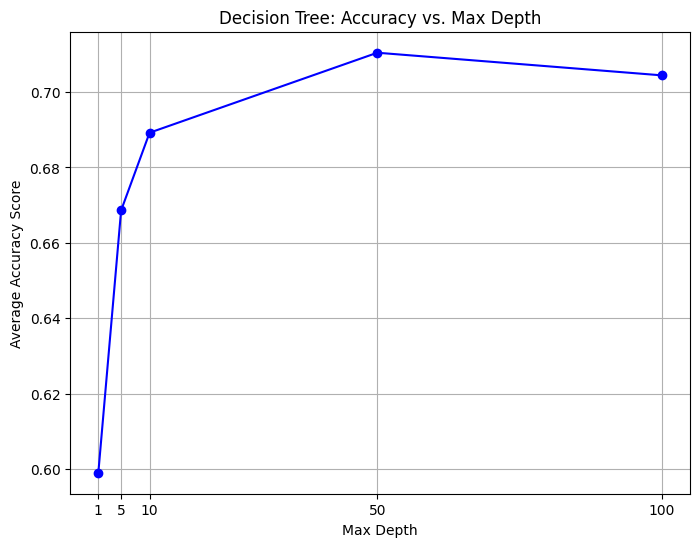

Best Decision Tree Depth:  50
Accuracy: 71.04 %


In [84]:
DT_DEPTHS = [1, 5, 10, 50, 100]
bestD = DT(x_test, y_test, DT_DEPTHS)

KNN N = 1 Completed in 3 Seconds with Accuracy of 57.40%
KNN N = 5 Completed in 3 Seconds with Accuracy of 59.00%
KNN N = 10 Completed in 3 Seconds with Accuracy of 58.82%
KNN N = 50 Completed in 3 Seconds with Accuracy of 65.43%
KNN N = 100 Completed in 3 Seconds with Accuracy of 65.97%
KNN N = 150 Completed in 3 Seconds with Accuracy of 64.60%


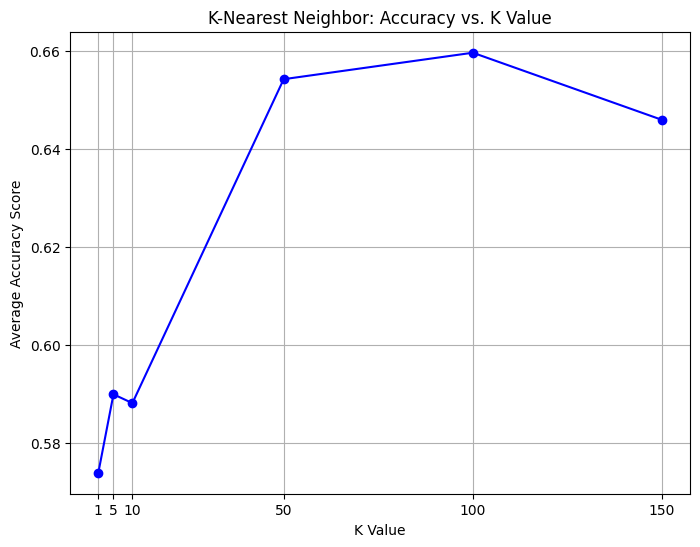

Best K Value:  100
Accuracy: 65.97 %


In [87]:
kVals = [1, 5, 10, 50, 100, 150]
bestK = KNN(x_test, y_test, kVals)

LR C = 0.001 Completed in 2 Seconds with Accuracy of 82.10%
LR C = 0.01 Completed in 3 Seconds with Accuracy of 85.61%
LR C = 0.1 Completed in 5 Seconds with Accuracy of 86.37%
LR C = 0.5 Completed in 6 Seconds with Accuracy of 85.86%
LR C = 1 Completed in 7 Seconds with Accuracy of 85.70%


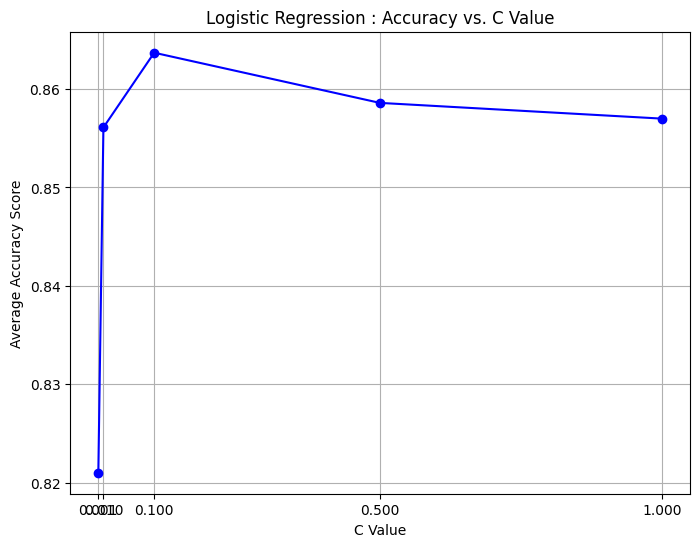

Best C Value:  0.1
Accuracy: 86.37 %


In [76]:
cVals = [0.001, 0.01, 0.1, 0.5, 1]
bestC = LR(x_test, y_test, cVals)

In [77]:
start = time.time()
DT = tree.DecisionTreeClassifier(max_depth=bestD)
DT.fit(x_train, y_train)
print(f"Time to Train DT {(time.time() - start):.0f} Seconds")

start = time.time()
KNN = KNeighborsClassifier(n_neighbors=bestK)
KNN.fit(x_train, y_train)
print(f"Time to Train KNN {(time.time() - start):.0f} Seconds")

start = time.time()              
LR = LogisticRegression(C=bestC)
LR.fit(x_train, y_train)
print(f"Time to Train LR {(time.time() - start):.0f} Seconds")

elapsed = time.time() - startTime
print(f"{elapsed:.0f} Seconds to Evaluate Hyperparameters and train models")

Time to Train DT 40 Seconds
Time to Train KNN 0 Seconds
Time to Train LR 3 Seconds
119 Seconds to Evaluate Hyperparameters and train models


c:\Users\A02329350\env\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


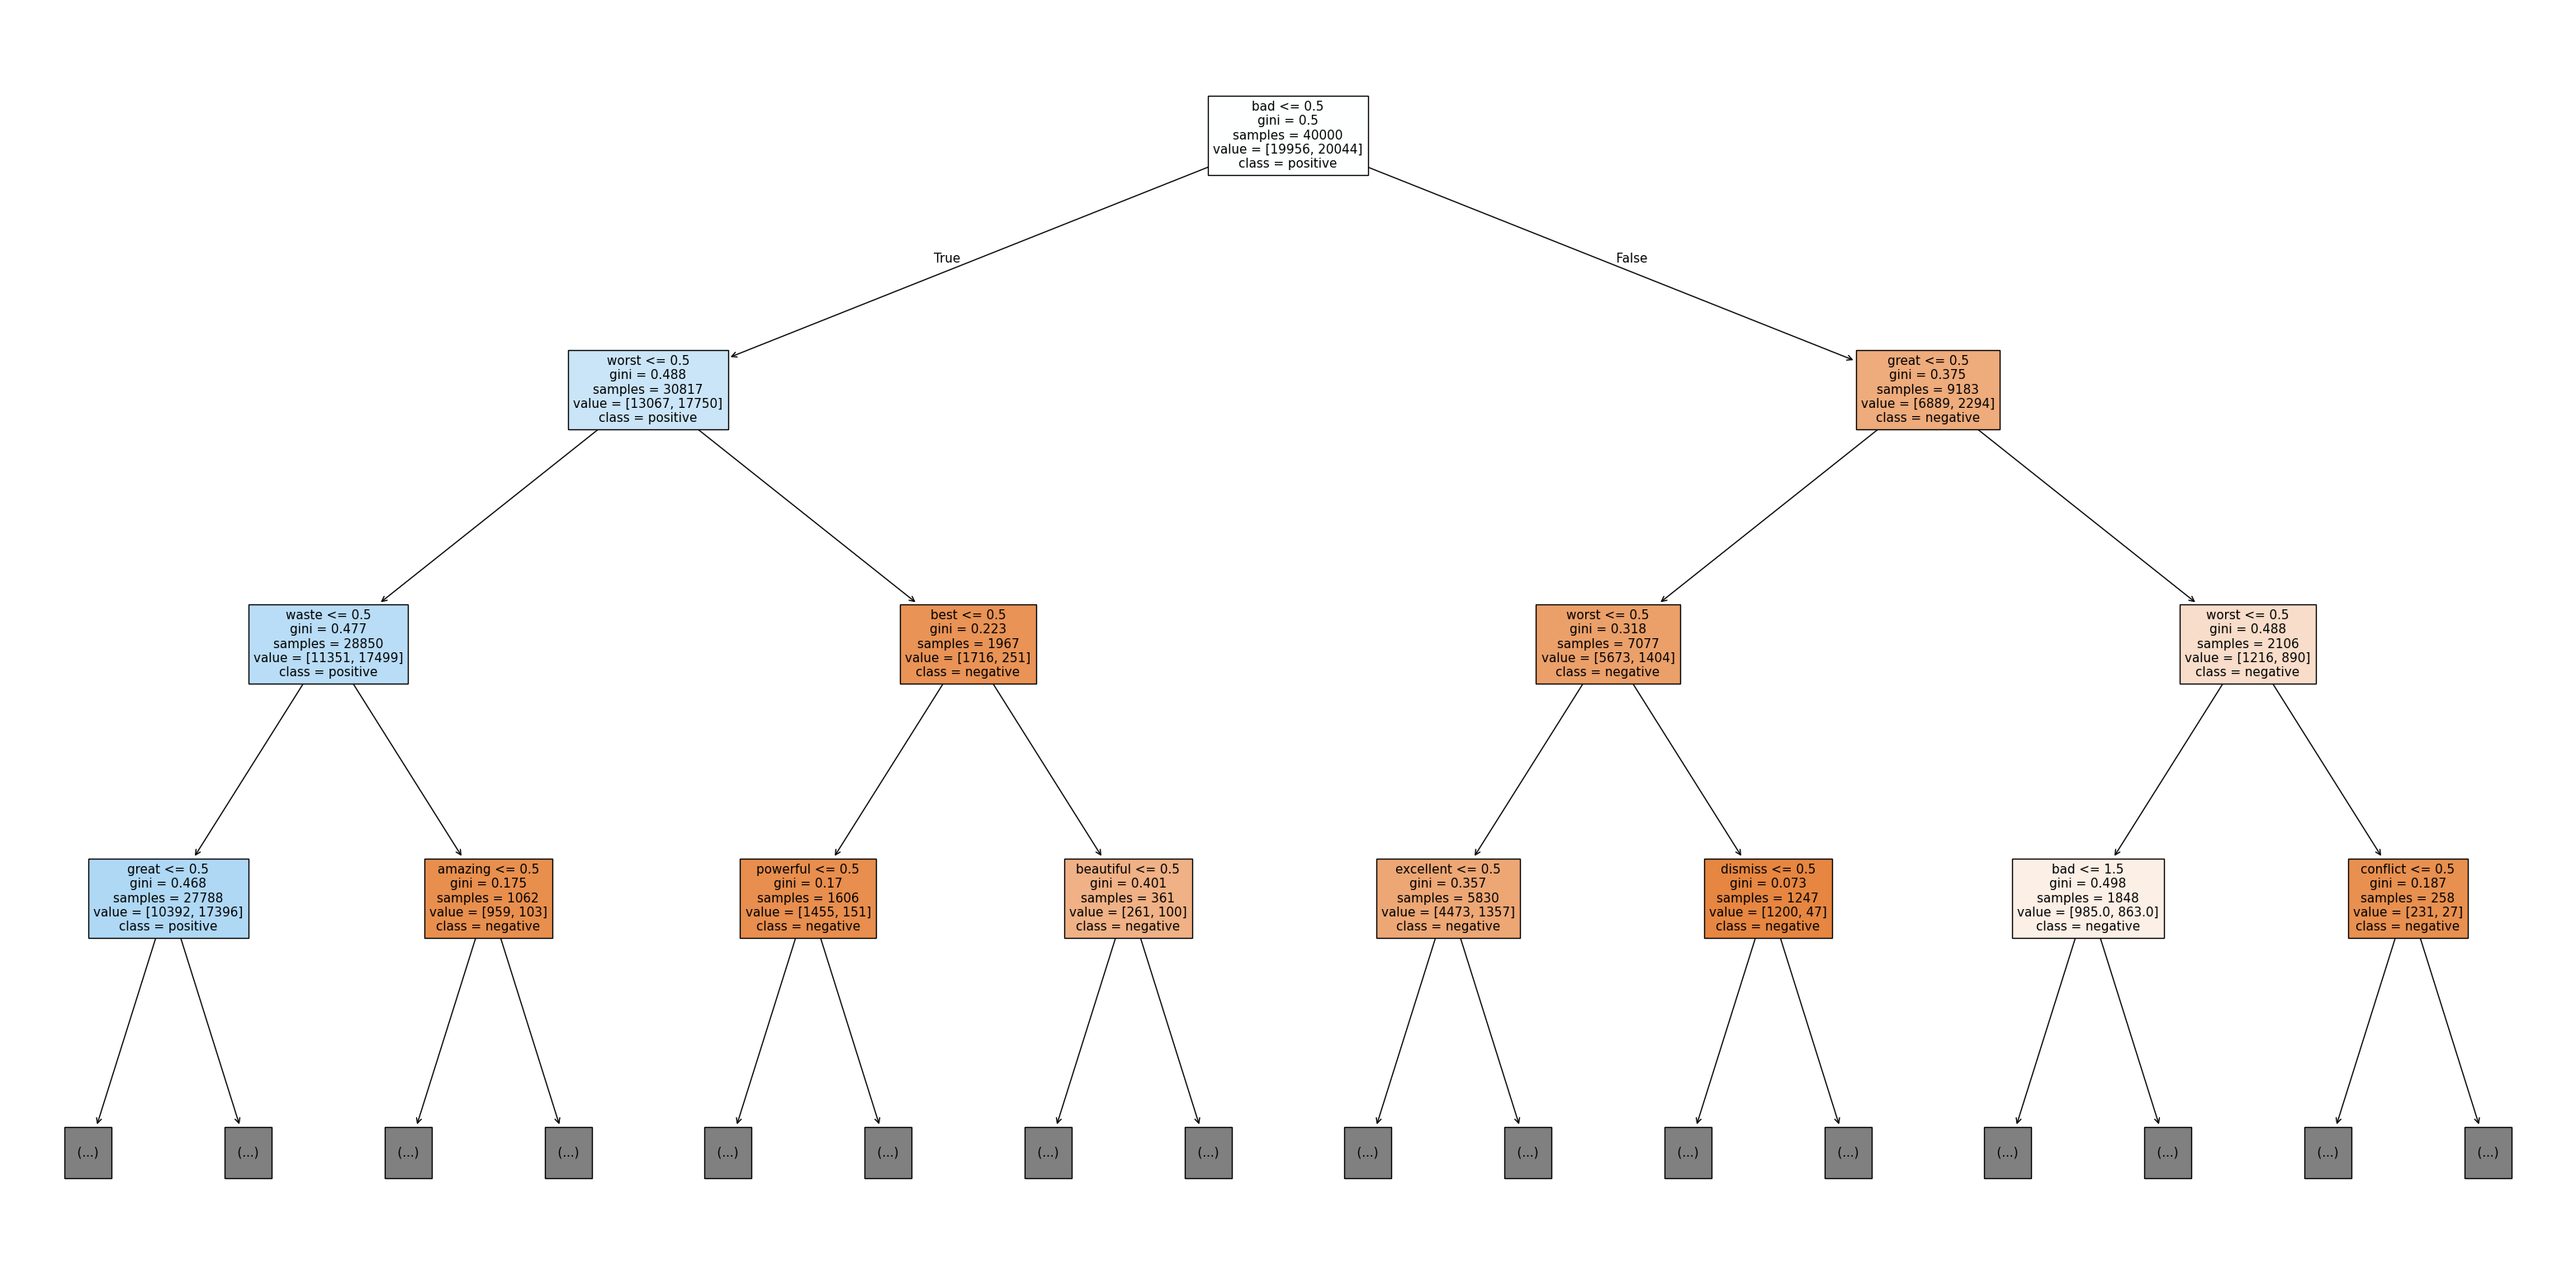

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = vectorizer.get_feature_names_out()
class_names = DT.classes_

plt.figure(figsize=(40, 20))
plot_tree(DT, filled=True, feature_names=feature_names, class_names=class_names, max_depth=3)
plt.show()


In [79]:
importances = DT.feature_importances_

words = vectorizer.get_feature_names_out()
importantWords = pd.DataFrame({
    'word': words,
    'importance': importances
})

mostImportant = importantWords.sort_values(by='importance', ascending=False)
print("Most Important Words\n")
print(mostImportant.head(15))


Most Important Words

             word  importance
14632         bad    0.098701
177191      worst    0.060523
68473       great    0.041507
172857      waste    0.037770
14033       awful    0.025377
21596      boring    0.018257
54362   excellent    0.017628
18188        best    0.014231
158623   terrible    0.012145
123107       poor    0.010220
153502     stupid    0.009930
123122     poorly    0.008274
176538  wonderful    0.007479
122111       plot    0.006857
94542        love    0.006192


Test Reviews

In [80]:
newReview = "This movie is good"

cleaned = newReview.lower().strip().translate(str.maketrans('', '', string.punctuation))
vectorized = vectorizer.transform([cleaned])

predictionDT = DT.predict(vectorized)
predictionKNN = KNN.predict(vectorized) 
predictionLR = LR.predict(vectorized)

print('Decision Tree:       Predicted Sentiment for: "' + newReview + '" is ' + predictionDT[0].upper())
print('K-Nearest Neighbor:  Predicted Sentiment for: "' + newReview + '" is ' + predictionKNN[0].upper())
print('Logistic Regression: Predicted Sentiment for: "' + newReview + '" is ' + predictionLR[0].upper())

Decision Tree:       Predicted Sentiment for: "This movie is good" is POSITIVE
K-Nearest Neighbor:  Predicted Sentiment for: "This movie is good" is POSITIVE
Logistic Regression: Predicted Sentiment for: "This movie is good" is POSITIVE
